In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


**IMPORTING MODULES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



**EXPOLATORY DATA ANALYSIS**

In [3]:
big_mart_data=pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#check the missing values
big_mart_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#replacing the missing values with the mean(for numeric type) and mode(for str type)
mean_val=big_mart_data['Item_Weight'].mean()
#fillng the Item_weight with the mean values
big_mart_data['Item_Weight'].fillna(mean_val,inplace=True)

In [6]:
#replacing the missing values in Outlet_size with mode
mode_outlet_size = big_mart_data['Outlet_Size'].mode()[0]
print(mode_outlet_size)

Medium


In [7]:
missing_values=big_mart_data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [8]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet_size)

In [9]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**DATA ANALYSIS**

In [10]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
sns.set()

<Figure size 600x600 with 0 Axes>

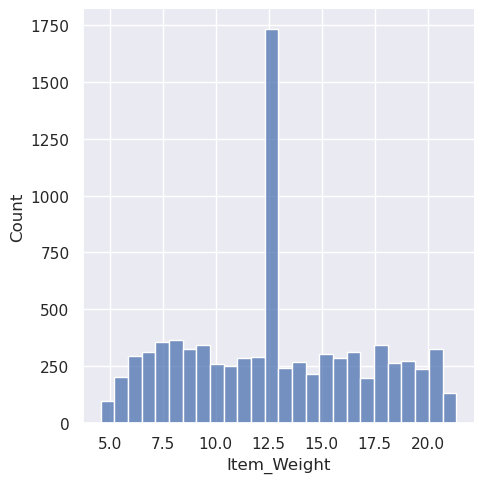

In [12]:
#Item_type distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

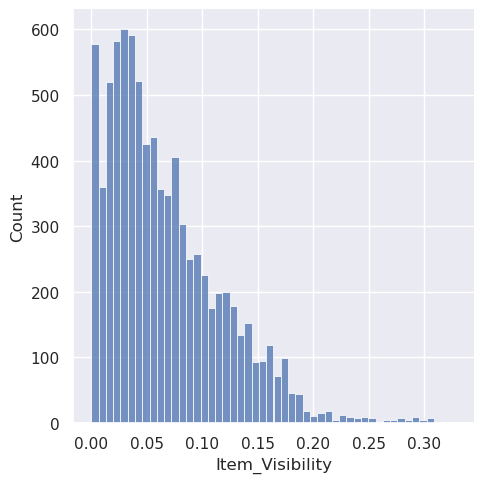

In [13]:
#Item_visibility Distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

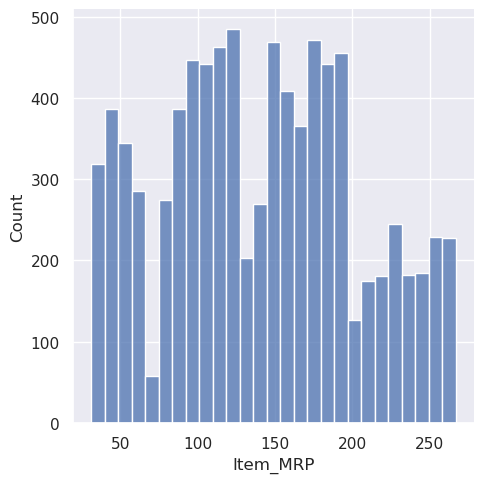

In [14]:
#Item_MRP Distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

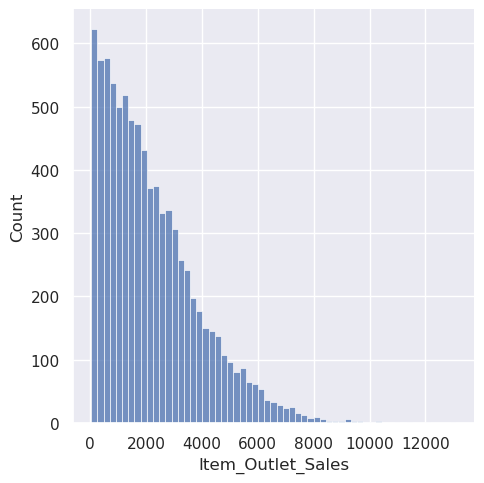

In [15]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

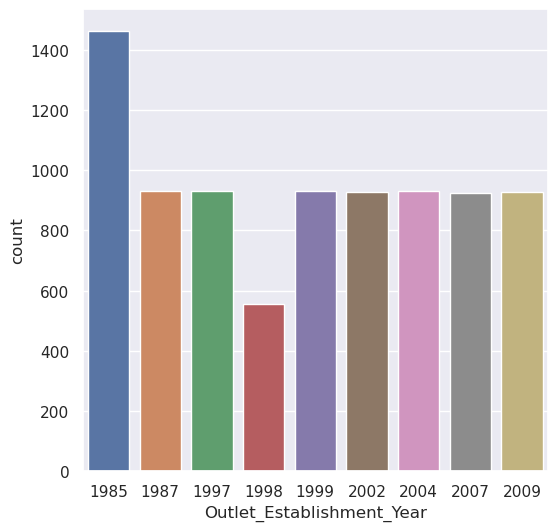

In [16]:
#Outlet_establishment_year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

**Categorical Features**

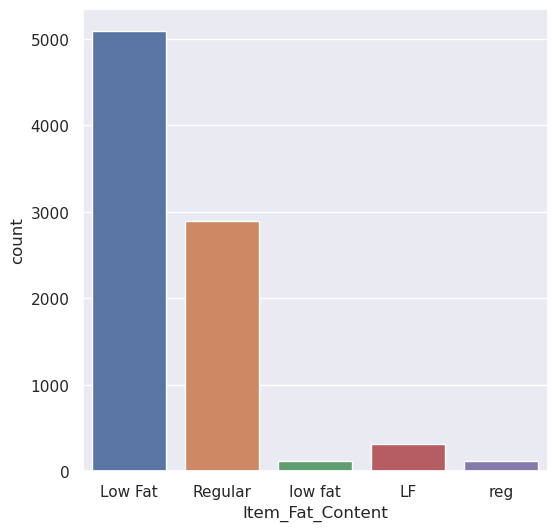

In [17]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

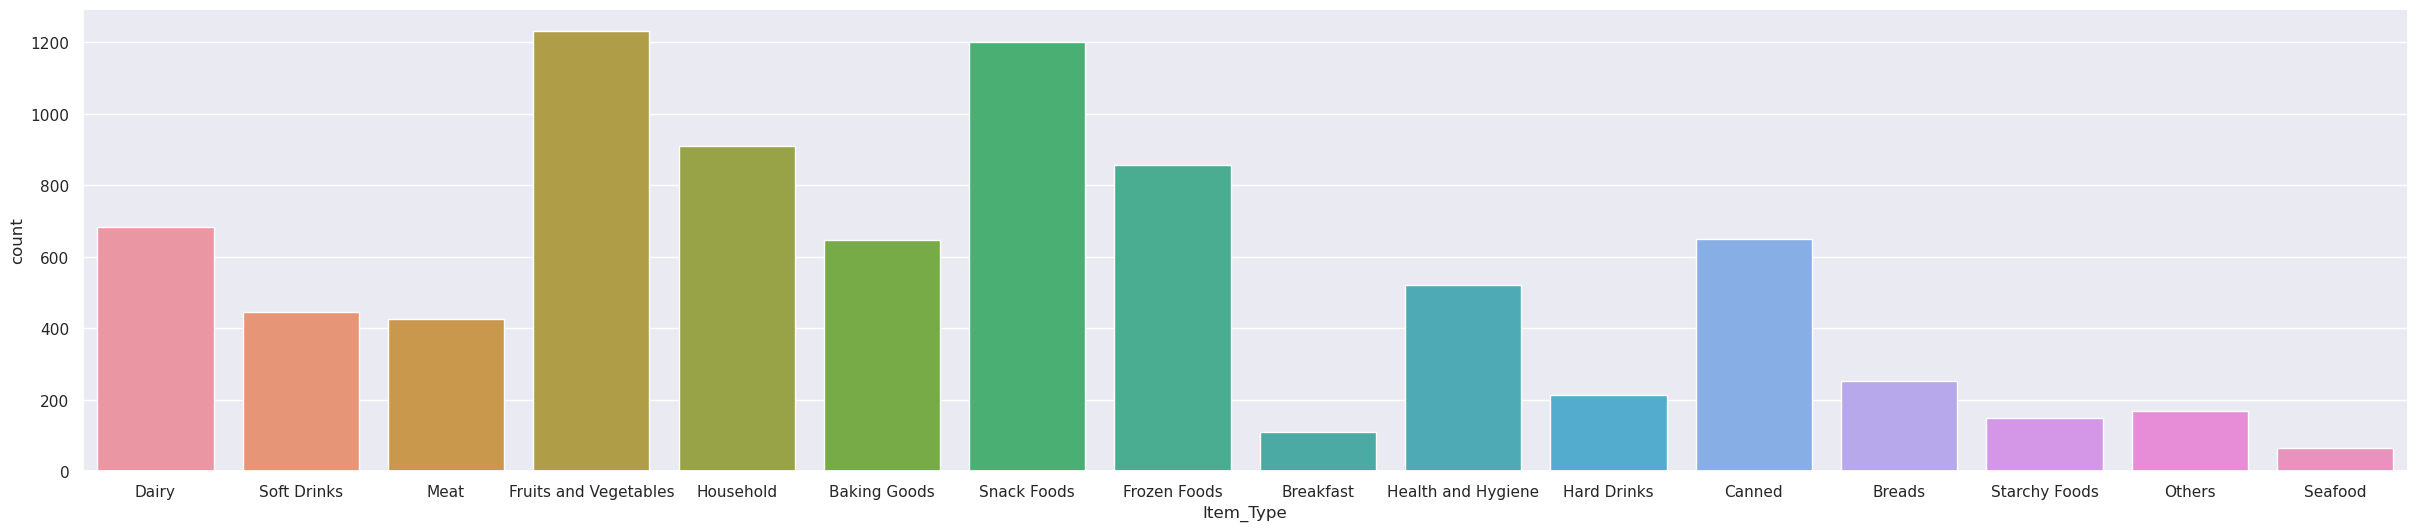

In [18]:
#Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

**Data Pre-Processing**

In [19]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':"Regular"}},inplace=True)

**Label Encoding**

In [22]:
#Converting the Categorical values to numeric values
encoder=LabelEncoder()


In [23]:
big_mart_data['Item_Identifier']=encoder.fit_transform(big_mart_data["Item_Identifier"])
big_mart_data['Item_Fat_Content']=encoder.fit_transform(big_mart_data["Item_Fat_Content"])
big_mart_data['Item_Type']=encoder.fit_transform(big_mart_data["Item_Type"])
big_mart_data['Outlet_Identifier']=encoder.fit_transform(big_mart_data["Outlet_Identifier"])
big_mart_data['Outlet_Size']=encoder.fit_transform(big_mart_data["Outlet_Size"])
big_mart_data['Outlet_Location_Type']=encoder.fit_transform(big_mart_data["Outlet_Location_Type"])
big_mart_data['Outlet_Type']=encoder.fit_transform(big_mart_data["Outlet_Type"])


In [24]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting Features and Target**

In [25]:
X=big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y=big_mart_data['Item_Outlet_Sales']

**Splitting the Dataset into Traning and Testing Data**

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Machine Learning Model Training**

In [27]:
regressor=XGBRegressor()
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {
    'n_estimators': [350],
    'learning_rate': [0.025],
    'max_depth': [6],
    'gamma': [0.1],
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
# Get the best model and its hyperparameters
best_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_regressor.predict(X_test)

# Calculate the root mean squared error (RMSE) on the test set
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("Test RMSE:", rmse)


# Print the best hyperparameters found during grid search
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Test RMSE: 1146.9892969544237
Best Hyperparameters:
gamma: 0.1
learning_rate: 0.025
max_depth: 6
n_estimators: 350


In [28]:
r2_score=metrics.r2_score(Y_test,y_pred)
print(r2_score)

0.5738410726283185
